# **Problem 1**

In [9]:
!pip install Pillow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

original image


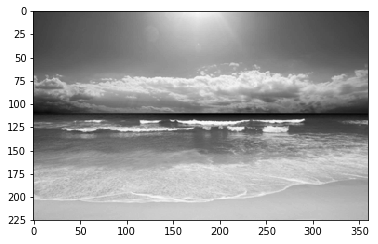

In [10]:
img = Image.open("/content/Ocean.bmp")
copy_img1 = img.copy()
copy_img2 = img.copy()

print("original image")
plt.imshow(img, cmap="gray")

**Increase Contrast**

In [0]:
def problem1 (img, a, b, c, d):
  q = 0.0
  for i in range (0,img.size[0]):
    for j in range (0,img.size[1]):
      p = img.getpixel((i,j))
      if p<=a:
        q = b*p +a
      elif p>a and p<=c:
        q = (p-a)*(d-b)//(c-a) +b
      elif p>c:
        q = (255-d)*(p-c)//(255-c) +d
        
        if(q<0):
          q=0
        if(q>255):
          q=255
      
      img.putpixel((i, j), q)
  return img

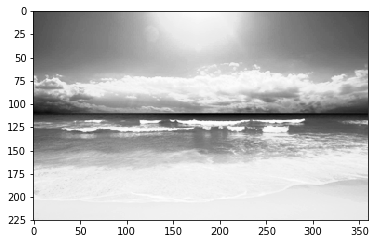

In [12]:
result1 = problem1(copy_img1, 30, 20, 180, 230)
plt.imshow(result1, cmap="gray")
plt.savefig("Ocean_a")

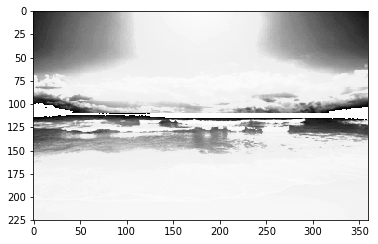

In [13]:
result2 = problem1(copy_img2, 70, 20, 140, 240)
plt.imshow(result2, cmap="gray")
plt.savefig("Ocean_b")

**Co-occurrence Matrix**

In [0]:
def get_pixels(img):
    pixels=np.zeros((img.size[0], img.size[1]));
    for i in range(0, len(pixels)):
      for j in range(0, pixels[0].size):
        pixels[i][j] = img.getpixel((i, j));
    
    return pixels;

In [0]:
def get_co_matrix (img):
#   get pixels of the image
  pixelsArray = get_pixels(img)
#   get the unique values to initialize the size of the co-occurrence matrix
  uniqueValues = np.unique(pixelsArray)
  coMatrix = np.zeros((uniqueValues.size+1, uniqueValues.size+1))
#   initialize the north column and the south row N/S of the matrix
  coMatrix[0][0] = -1
  for i in range(1, uniqueValues.size+1):
    coMatrix [0][i] = uniqueValues[i-1]
    coMatrix [i][0] = uniqueValues[i-1] 
#      calculate the co-occurrence matrix  
  for i in range(1, len(coMatrix)):
#   find the indicies of element i in the N
    rows, cols = np.where(pixelsArray==coMatrix[i][0])
  #   south
    for j in range(1, (coMatrix[0].size)):
      count =0
      for x in range(0, rows.size):
        if rows[x]+1 != len(pixelsArray):
          if pixelsArray[rows[x]+1][cols[x]] == coMatrix[0][j]:
            count = count+1
      coMatrix[i][j] = count
  return coMatrix
   

**Contrast**

In [0]:
def get_contrast(comat):
  contrast = 0
  for i in range (1, len(comat)):
    for j in range (1, comat[0].size):
      contrast = contrast + comat[i][j]*(comat[i][0]-comat[0][j])**2
  return contrast

In [17]:
cmat  = get_co_matrix(img)
cmat1 = get_co_matrix(result1)
cmat2 = get_co_matrix(result2)

contrast = get_contrast(cmat)
contrast1 = get_contrast(cmat1)
contrast2 = get_contrast(cmat2)


print(contrast)
print(contrast1)
print(contrast2)

1281482.0
1568818.0
6481540.0


**save contrast values to a text file**

In [0]:
f= open("contrast.txt","w+")
f.write("Ocean = %d\r\n" % (contrast))
f.write("Ocean_a = %d\r\n" % (contrast1))
f.write("Ocean_b = %d\r\n" % (contrast2))
f.close()